<a href="https://colab.research.google.com/github/kansu-lab/deep_learning_class/blob/master/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pathlib
import tensorflow as tf


##Part 1, Question 1

In [ ]:
dataset_url = "https://github.com/kansu-lab/deep_learning_class/blob/master/p1q1.pdf"
data_dir = tf.keras.utils.get_file(origin=dataset_url, 
                                   fname='p1q1', 
                                   untar=True)
data_dir = pathlib.Path(data_dir)

##Part 1, Question 2

In [ ]:
h1= relu (x1*w11+x2*w21+b1)=a*(x1*w11+x2*w21+b1)
h2= relu (x1*w12+x2*w22+b2)=a*(x1*w12+x2*w22+b2)
h3= relu (x1*w13+x2*w23+b3)=a*(x1*w13+x2*w23+b3)
h4= relu (x1*w14+x2*w24+b4)=a*(x1*w14+x2*w24+b4)
y_hat=sigmoid( h1*v1+h2*v2+h3*v3+h4*v4+c) 
y_hat=sigmoid(a*(x1*w11+x2*w21+b1)*v1+a*(x1*w12+x2*w22+b2)*v2+a*(x1*w13+x2*w23+b3)*v3+a*(x1*w14+x2*w24+b4)*v4+c)
y_hat= 1/ (1+np.exp(np.array(-(a*(x1*w11+x2*w21+b1)*v1+a*(x1*w12+x2*w22+b2)*v2+a*(x1*w13+x2*w23+b3)*v3+a*(x1*w14+x2*w24+b4)*v4+c))))

## Part 1, Question 3

In [ ]:

def ReLu(z):
  return np.maximum(0,z)

def sigmoid(z):
  return 1/(1+np.exp(-np.array(z)))

def ff_nn_ReLu(X, W, b, V, c):
  H=ReLu(np.dot(np.array(X),np.array(W))+b)
  Y=sigmoid(np.dot(H,np.array(V))+c)
  return Y

## Part 1, Question 4


In [ ]:

X=[[1, -1],
   [0, -1],
   [0, 1]]

W=[[1, -1, 0, 1],
   [0, 0, 0.5, 1]]

V=[1, 0, -1, 1]

b=[0, 0, 1, 0]
c=[1]

Y=ff_nn_ReLu(X, W, b, V, c)

print('the results of each sample are', Y)

the results of each sample are [0.81757448 0.62245933 0.62245933]


## Answer
### The prefiction of the first input is class 1.
### The prefiction of the second input is class 1.
### The prefiction of the third input is class 1.

##Part 2, Question 1

In [ ]:
from sympy import symbols, diff
x, y, z = symbols('x y z', real=True)
f = (3-x**3) + 50*(2*y**2-x)**2

In [ ]:
df_dx = diff(f, x)
print(df_dx)

-3*x**2 + 100*x - 200*y**2


In [ ]:
df_dy = 800 * y**3 - 400 * x * y


##Part 2, Question 2

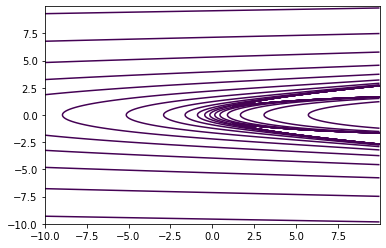

In [4]:
delta = 0.025
x = np.arange(-10.0, 10.0, delta)
y = np.arange(-10.0, 10.0, delta)
X, Y = np.meshgrid(x, y)
Z = (3-X**3) + 50*(2*Y**2-X)**2
fig, ax = plt.subplots()
plt.contour(X, Y, Z, np.logspace(-5,20,base=10))

##Part 2, Question 3

In [5]:
def grad_f(vector):
    x, y = vector
    df_dx = -3*x**2 + 100*x - 200*y**2
    df_dy  = 800 * y**3 - 400 * x * y
    return np.array([df_dx, df_dy])

In [6]:
def grad_descent(starting_point=None, iterations=50, learning_rate=0.01):
  if starting_point is None:
    point = np.random.uniform(-10, 10, size = 2)
  else: 
    point = starting_point
  trajectory = [point]

  for i in range (iterations):
    grad = grad_f(point)
    point = point - learning_rate * grad
    trajectory.append(point)

  return np.array(trajectory)
  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


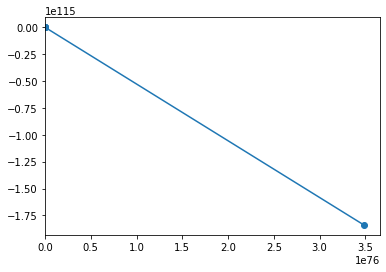

In [9]:
np.random.seed(10)
traj = grad_descent(iterations=50, learning_rate=0.01)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


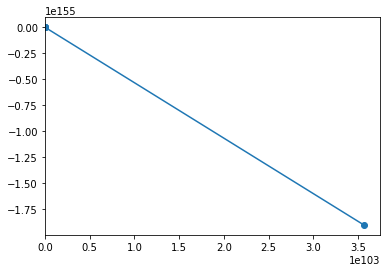

In [ ]:
# Visualize your results with a few different learning rates.
# learning_rate=0.1
np.random.seed(10)
traj = grad_descent(iterations=50, learning_rate=0.1)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


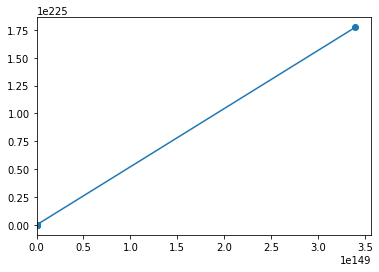

In [ ]:
# learning_rate=0.001
np.random.seed(10)
traj = grad_descent(iterations=50, learning_rate=0.001)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


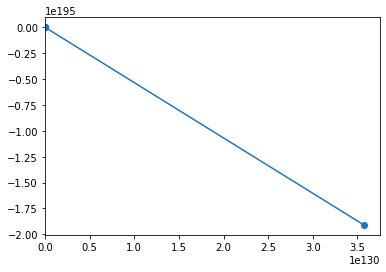

In [ ]:
# learning_rate=1
np.random.seed(10)
traj = grad_descent(iterations=50, learning_rate=1)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

## answer 

###By changing the learning rate, I could see that when learning rate = 0.01 and 0.1, the result does not show much difference. But when learning rate = 1, y has a larger value range, from [-1.75,0] to [-2,0]. When learning rate = 0.001, the y value range for the point changes to [0,1.75]. 

##Part 2, Question 4

In [ ]:
def grad_descent_with_momentum(starting_point=None, iterations=10, alpha=.9, epsilon=10):
  if starting_point is None:
      point = np.random.uniform(-10,10,size=2)
  else:
      point= starting_point

  outcome=[point]
  veracity = np.zeros(point.size)


  for i in range(iterations):
    grad= grad_f(point)
    veracity= alpha *veracity + grad*epsilon
    point= point-veracity
    outcome.append(point)

  return np.array(outcome)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


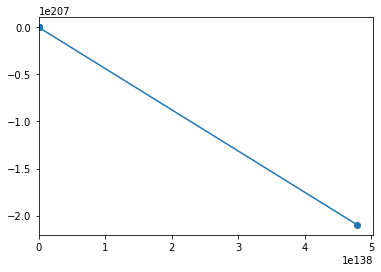

In [ ]:
np.random.seed(10)
traj = grad_descent_with_momentum(iterations=50, epsilon=2, alpha=.5)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


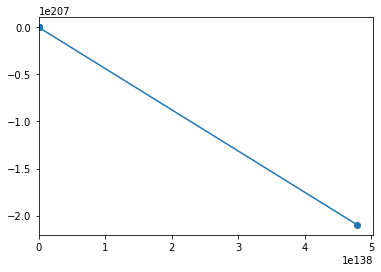

In [ ]:
# visualize it with different hyperparameters
#iterations=50, epsilon=2, alpha=.5
np.random.seed(10)
traj = grad_descent_with_momentum(iterations=50, epsilon=2, alpha=.5)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


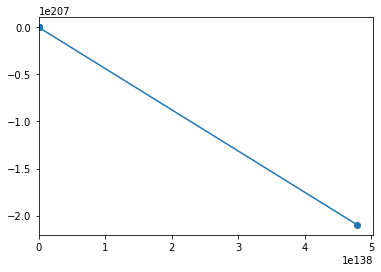

In [ ]:
# iterations=50, epsilon=3, alpha=.5
# changing epsilon from 2 to 3 
np.random.seed(10)
traj = grad_descent_with_momentum(iterations=50, epsilon=2, alpha=.5)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


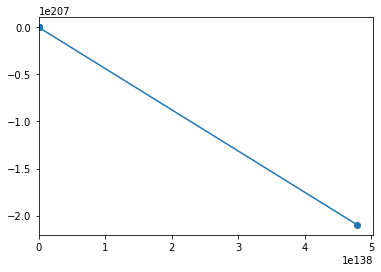

In [ ]:
#iterations=50, epsilon=2, alpha=.05
# changing alpha from .5 to .05
np.random.seed(10)
traj = grad_descent_with_momentum(iterations=50, epsilon=2, alpha=.25)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


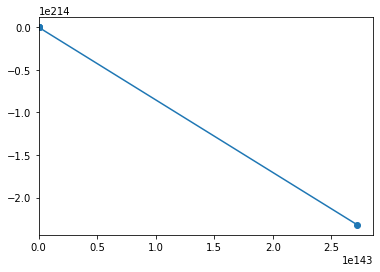

In [ ]:
#iterations=50, epsilon=3, alpha=.1

np.random.seed(10)
traj = grad_descent_with_momentum(iterations=50, epsilon=3, alpha=.1)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


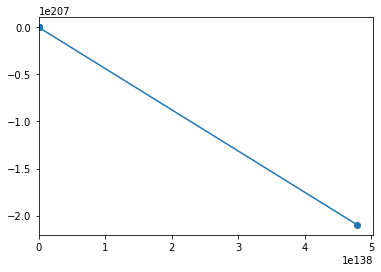

In [ ]:
#iterations=25, epsilon=2, alpha=.5
np.random.seed(10)
traj = grad_descent_with_momentum(iterations=25, epsilon=2, alpha=.5)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

## Answer
### With the same iterations value (50) and alpha value(0.25), when changing epsilon from 2 to 3, y value does not show much change.with the same iterations value (50), and epsilon (2),  changing alpha from .5 to .05, y value still does not show much change. 

### With the same iterations value (50) but when epsilon is changed to 3, and alpha is changed to .1, y values does not show much change, but value range for x changes from [0,5] to [0,2.75]. 

### Keep epsilon=2, alpha=.5, and changes iterations to 25, the x and y value do not change. 

##Part 3, Question 1

In [ ]:
dataset_url = "https://github.com/kansu-lab/deep_learning_class/blob/master/P3%20Q1.pdf"
data_dir = tf.keras.utils.get_file(origin=dataset_url, 
                                   fname='p3q1', 
                                   untar=True)
data_dir = pathlib.Path(data_dir)

##Part 3, Question 2

In [ ]:
def grad_f(param_vector, x, y):
    """
    Computes local gradient vector for squared-error loss on model parameters
    """
   

    w11, w12, w13, w14,w21, w22, w23, w24, b1,b2,b3,b4,v1,v2,v3,v4,c = param_vector
   
    y_hat= 1/ (1+np.exp(np.array(-(a*(x1*w11+x2*w21+b1)*v1+a*(x1*w12+x2*w22+b2)*v2+a*(x1*w13+x2*w23+b3)*v3+a*(x1*w14+x2*w24+b4)*v4+c))))
    residuals = y_hat(1-y_hat)
    binary_class_derivative = (y/y_hat-(1-y)/(1-y_hat))
   

    dL_dw11 = -np.average(residuals*v1*x1*binary_class_derivative)
    dL_dw12 = -np.average(residuals*v2*x1*binary_class_derivative)
    dL_dw13 = -np.average(residuals*v3*x1*binary_class_derivative)
    dL_dw14 = -np.average(residuals*v4*x1*binary_class_derivative)

    dL_dw21 = -np.average(residuals*v1*x2*binary_class_derivative)
    dL_dw22 = -np.average(residuals*v2*x2*binary_class_derivative)
    dL_dw23 = -np.average(residuals*v3*x2*binary_class_derivative)
    dL_dw24 = -np.average(residuals*v4*x2*binary_class_derivative)



    dL_dwb1 = -np.average(residuals*v1*binary_class_derivative)
    dL_dwb2 = -np.average(residuals*binary_class_derivative*v2)
    dL_dwb3 = -np.average(residuals*binary_class_derivative*v3)
    dL_dwb4 = -np.average(residuals*binary_class_derivative*v4)
        

    dL_dc = -np.average(residuals*binary_class_derivative)
    dL_dv1= -np.average(residuals*binary_class_derivative*relu(x1*w11+x2*w21+b1))
    dL_dv2= -np.average(residuals*binary_class_derivative*relu(x1*w12+x2*w22+b2))
    dL_dv3= -np.average(residuals*binary_class_derivative*relu(x1*w13+x2*w23+b3))
    dL_dv4= -np.average(residuals*binary_class_derivative*relu(x1*w14+x2*w24+b4))

  
    return np.array([dL_dw11, dL_dw12, dL_dw13, dL_dw14,dL_dw21, dL_dw22, dL_dw23, dL_dw24, dL_dwb1,dL_dwb2,dL_dwb3,dL_dwb4,dL_dc,dL_dv1,dL_dv2,dL_dv3,dL_dv4])

In [ ]:
# for coding 
def grad_f(X,Y,W,b,V,c):
  Y_hat=ff_nn_ReLu(X,W,b,V,c)
  loss=(Y/Y_hat-(1-Y)/(1-Y_hat))
  h=ReLu(np.dot(X,W)+b)

  dc=loss*(Y_hat*(1-Y_hat))
  dv=dc.T.dot(h)
  db=dc.T.dot(np.where(h<=0,0,1))*V
  dw=X.T.dot(np.expand_dims(dc,1)).dot(np.expand_dims(V,1).T)
  dc=np.average(loss*(Y_hat*(1-Y_hat)))
  return np.array([dw,db,dv,dc])

##Part 3, Question 3

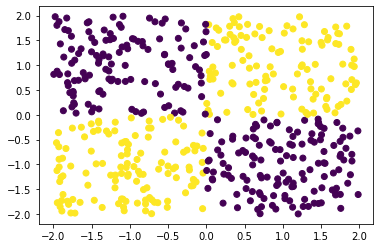

In [ ]:
x = np.random.uniform(-2,2,1000).reshape((500,2))
y = np.zeros(500)
y[x[:,0] * x[:,1]>0]=1

plt.scatter(x[:,0],x[:,1],c=y)

##Part 3, Question 4

In [ ]:
def loss(Y, Y_hat):
    return  np.sum(-(Y*np.log(Y_hat) + (1-Y)*np.log(1-Y_hat)))

def grad_descent(X, Y, W, b, V, c, iterations=20, learning_rate=0.0015):
  Y_hat=ff_nn_ReLu(X,W,b,V,c)
  losses=[loss(Y,Y_hat)]

  for i in range(iterations):
    dw, db, dv, dc = grad_f(X, Y, W, b, V, c)
    W = W+learning_rate*dw
    b = b+learning_rate*db
    V = V+learning_rate*dv
    c = c+learning_rate*dc
    Y_hat=ff_nn_ReLu(X,W,b,V,c)
    losses.append(loss(Y,Y_hat))
  params=np.array([W,b,V,c])
  return params, losses



In [ ]:
# loss function for the model 
def loss(y_hat, y_true):
  '''
  binary crossentropy loss for label-encoded inputs
  '''
  return np.sum(- y_true*np.log(y_hat) - (1-y_true)* np.log(1-y_hat))

In [ ]:

params, losses = grad_descent(x, y, W, b, V, c)

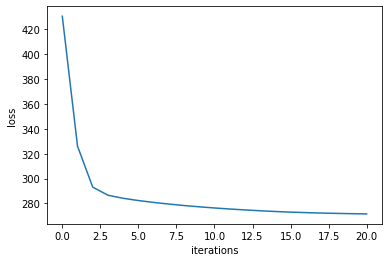

In [ ]:

plt.plot(losses)
plt.ylabel("loss")
plt.xlabel("iterations")
plt.show()

##Part 3, Question 5

In [ ]:

def grad_descent_with_momentum(X, Y, W, B, V, C, iterations=20, alpha=0.4, epsilon=0.0015):
  Y_hat = ff_nn_ReLu(X,W,B,V,C)
  losses = [loss(Y, Y_hat)]
  w = np.zeros(np.array(W).shape)
  b = np.zeros(np.array(B).size)
  v = np.zeros(np.array(V).size)
  c = 0

  for i in range(iterations):
    dw,db,dv,dc = grad_f(X, Y, W, B, V, C)
    
    w = alpha*w - epsilon*dw
    b = alpha*b - epsilon*db
    v = alpha*v - epsilon*dv
    c = alpha*c - epsilon*dc
    W = W-w
    B = B-b
    V = V-v
    C = C-c
    Y_hat = ff_nn_ReLu(X,W,B,V,C)

    losses.append(loss(Y, Y_hat))
    params=np.array([W,B,V,C])
  return params, losses

In [ ]:
params_momentum, losses =  grad_descent_with_momentum(x, y, W, b, V, c)

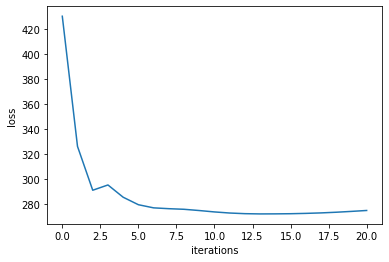

In [ ]:

plt.plot(losses)
plt.ylabel("loss")
plt.xlabel("iterations")
plt.show()


##Part 3, Question 6

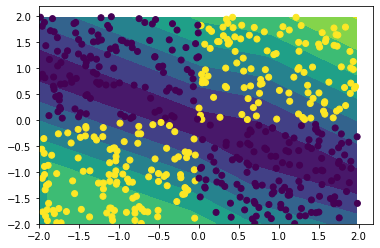

In [ ]:
x1 = np.arange(-2.0, 2.0, 0.025)
x2 = np.arange(-2.0, 2.0, 0.025)

X1, X2 = np.meshgrid(x1, x2)
W, B, V, C= params_momentum

Y_hat= ff_nn_ReLu(np.array((X1.ravel(),X2.ravel())).T,W,B,V,C).reshape((160,160))
plt.contourf(X1, X2, Y_hat)
plt.scatter(x[:, 0], x[:, 1], c=y)